In [1]:
import sys
sys.path.append("../../..")

import helper as hlp
import pandas as pd
import numpy as np

[nltk_data] Downloading package stopwords to C:\Users\Abdul
[nltk_data]     Manaf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
EPOCHS = 50
MAX_LEN = 30
N_CLASSES = 5
BATCH_SIZE = 64
LEARNING_RATE = 2e-5
NAME = 'xlm(roberta)-urdu'
MODEL_NAME = 'xlm-roberta-base'
dir = '../../../../Dataset Statistics/dataset'
path = f'../saved_models/{NAME}'
class_names = ['Disability', 'Gender/Sexual', 'Origin/Nationality', 'Race/Ethnicity', 'Religion']

In [3]:
train_df = pd.read_csv(f'{dir}/train.csv')
val_df = pd.read_csv(f'{dir}/val.csv')
test_df = pd.read_csv(f'{dir}/test.csv')

train_df = train_df[train_df['class'] != 0]
val_df = val_df[val_df['class'] != 0]
test_df = test_df[test_df['class'] != 0]

train_texts = train_df['urdu_text'].values
val_texts = val_df['urdu_text'].values
test_texts = test_df['urdu_text'].values

train_labels = train_df[class_names].values
val_labels = val_df[class_names].values
test_labels = test_df[class_names].values

In [4]:
#show 5 values along with their labels
for i in range(5):
    print(train_texts[i], train_labels[i])

آپ کو کس نے لہروں میں لہر بنانی ہے؟ [0 0 0 1 0]
وہ کتیا بالکل ٹھیک لگ رہا ہے. [0 1 0 0 0]
ہم اب سارے پلیٹ فارم پر، تو اگلی بار جب آپ ایک بری کتیا کے ساتھ ایک خوبصورت عورت سے رابطہ کرتے ہیں، جو آپ کو پسند ہے، وہ آپ کو مختلف طریقے سے بتا سکتے ہیں [0 1 0 0 0]
صرف ایک بال کی گولی مل گئی، کسی نے مجھے میری کتیا سے لے سکتا ہے [0 1 0 0 0]
@ReallyVirtual-اسای ٹی وی پی ٹی کے مطابق اگر تمام Y ایسا محسوس کرتا ہے کہ وہ ایسا کر سکتے ہیں. اس وقت کیا کر سکتے ہیں. [0 0 0 1 0]


In [5]:
#show 5 values along with their labels
for i in range(5):
    print(hlp.preprocess_text(train_texts[i], language="urdu")
    , train_labels[i])

آپ کو کس نے لہروں میں لہر بنانی ہے؟ [0 0 0 1 0]
وہ کتیا بالکل لگ رہا [0 1 0 0 0]
ہم اب سارے پلیٹ فارم پر، اگلی بار جب آپ بری کتیا ساتھ خوبصورت عورت سے رابطہ ہیں، جو آپ کو پسند ہے، وہ آپ کو مختلف سے بتا سکتے [0 1 0 0 0]
صرف بال گولی مل گئی، کسی نے مجھے میری کتیا سے سکتا [0 1 0 0 0]
reallyvirtualاسای ٹی وی پی ٹی مطابق اگر تمام y ایسا محسوس کرتا وہ ایسا کر سکتے اس وقت کیا کر سکتے [0 0 0 1 0]


In [6]:
## apply preprocessing to all texts
train_texts = [hlp.preprocess_text(text, language="urdu") for text in train_texts]
val_texts = [hlp.preprocess_text(text, language="urdu") for text in val_texts]
test_texts = [hlp.preprocess_text(text, language="urdu") for text in test_texts]

In [7]:
## mbert model and tokenizer
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

from transformers import XLMRobertaTokenizer, XLMRobertaForSequenceClassification

tokenizer = XLMRobertaTokenizer.from_pretrained(MODEL_NAME)
model = XLMRobertaForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=N_CLASSES)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

c:\Users\Abdul Manaf\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\utils\_runtime.py:184: UserWarning: Pydantic is installed but cannot be imported. Please check your installation. `huggingface_hub` will default to not using Pydantic. Error message: '{e}'
  warnings.warn(
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [8]:
train_data_loader = hlp.create_data_loader(train_texts, train_labels, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = hlp.create_data_loader(val_texts, val_labels, tokenizer, MAX_LEN, BATCH_SIZE)

history = hlp.train_model_multi(train_data_loader, val_data_loader, model, optimizer, device, EPOCHS, tokenizer, path)

Epoch 0/50
----------


Training Progress: 100%|██████████| 481/481 [01:53<00:00,  4.22it/s, loss=0.249]


Train loss 0.2877210284159238 accuracy 0.48023407022106634
Validation loss 0.23269117267235465 accuracy 0.6599375853325532
Model and tokenizer saved at epoch 0
Checkpoint saved: Improved validation accuracy at epoch 0: 0.6599375853325532
Epoch 1/50
----------


Training Progress: 100%|██████████| 481/481 [01:52<00:00,  4.28it/s, loss=0.223]


Train loss 0.23074512131001002 accuracy 0.6484395318595578
Validation loss 0.22071998015693997 accuracy 0.6986541837331773
Model and tokenizer saved at epoch 1
Checkpoint saved: Improved validation accuracy at epoch 1: 0.6986541837331773
Epoch 2/50
----------


Training Progress: 100%|██████████| 481/481 [01:51<00:00,  4.29it/s, loss=0.233]


Train loss 0.21735653160391627 accuracy 0.6814694408322497
Validation loss 0.21727440048078572 accuracy 0.704017944216891
Model and tokenizer saved at epoch 2
Checkpoint saved: Improved validation accuracy at epoch 2: 0.704017944216891
Epoch 3/50
----------


Training Progress: 100%|██████████| 481/481 [01:53<00:00,  4.25it/s, loss=0.214]


Train loss 0.20796526801189613 accuracy 0.7017555266579975
Validation loss 0.21745042044738805 accuracy 0.7118197776477472
Model and tokenizer saved at epoch 3
Checkpoint saved: Improved validation accuracy at epoch 3: 0.7118197776477472
Epoch 4/50
----------


Training Progress: 100%|██████████| 481/481 [01:53<00:00,  4.24it/s, loss=0.177]


Train loss 0.19488038492859525 accuracy 0.7304291287386215
Validation loss 0.22032843715285663 accuracy 0.7072362005071192
No improvement in validation accuracy for 1 epochs.
Epoch 5/50
----------


Training Progress: 100%|██████████| 481/481 [01:51<00:00,  4.31it/s, loss=0.165] 


Train loss 0.18235684695833687 accuracy 0.7554941482444734
Validation loss 0.22991460006429543 accuracy 0.7141603276770041
Model and tokenizer saved at epoch 5
Checkpoint saved: Improved validation accuracy at epoch 5: 0.7141603276770041
Epoch 6/50
----------


Training Progress: 100%|██████████| 481/481 [01:54<00:00,  4.21it/s, loss=0.142] 


Train loss 0.1681930013078414 accuracy 0.7807867360208063
Validation loss 0.23783405847060754 accuracy 0.7203042715038034
Model and tokenizer saved at epoch 6
Checkpoint saved: Improved validation accuracy at epoch 6: 0.7203042715038034
Epoch 7/50
----------


Training Progress: 100%|██████████| 481/481 [01:49<00:00,  4.38it/s, loss=0.104] 


Train loss 0.15362165750560047 accuracy 0.8079323797139142
Validation loss 0.26146265836606114 accuracy 0.7185488589818607
No improvement in validation accuracy for 1 epochs.
Epoch 8/50
----------


Training Progress: 100%|██████████| 481/481 [01:51<00:00,  4.30it/s, loss=0.0996]


Train loss 0.14255517024910871 accuracy 0.8278608582574772
Validation loss 0.26564935849320076 accuracy 0.7172810610493466
No improvement in validation accuracy for 2 epochs.
Epoch 9/50
----------


Training Progress: 100%|██████████| 481/481 [01:50<00:00,  4.33it/s, loss=0.0828]


Train loss 0.12408555831117342 accuracy 0.8535760728218466
Validation loss 0.2912104686039575 accuracy 0.7080163838502048
No improvement in validation accuracy for 3 epochs.
Epoch 10/50
----------


Training Progress: 100%|██████████| 481/481 [01:51<00:00,  4.32it/s, loss=0.019] 


Train loss 0.11174452474840342 accuracy 0.8742197659297789
Validation loss 0.31542523149748025 accuracy 0.7163058318704896
No improvement in validation accuracy for 4 epochs.
Epoch 11/50
----------


Training Progress: 100%|██████████| 481/481 [01:51<00:00,  4.32it/s, loss=0.031] 


Train loss 0.10032316455675634 accuracy 0.8884590377113134
Validation loss 0.3115276656350734 accuracy 0.7037253754632339
No improvement in validation accuracy for 5 epochs.
Stopping early due to lack of improvement in validation accuracy.


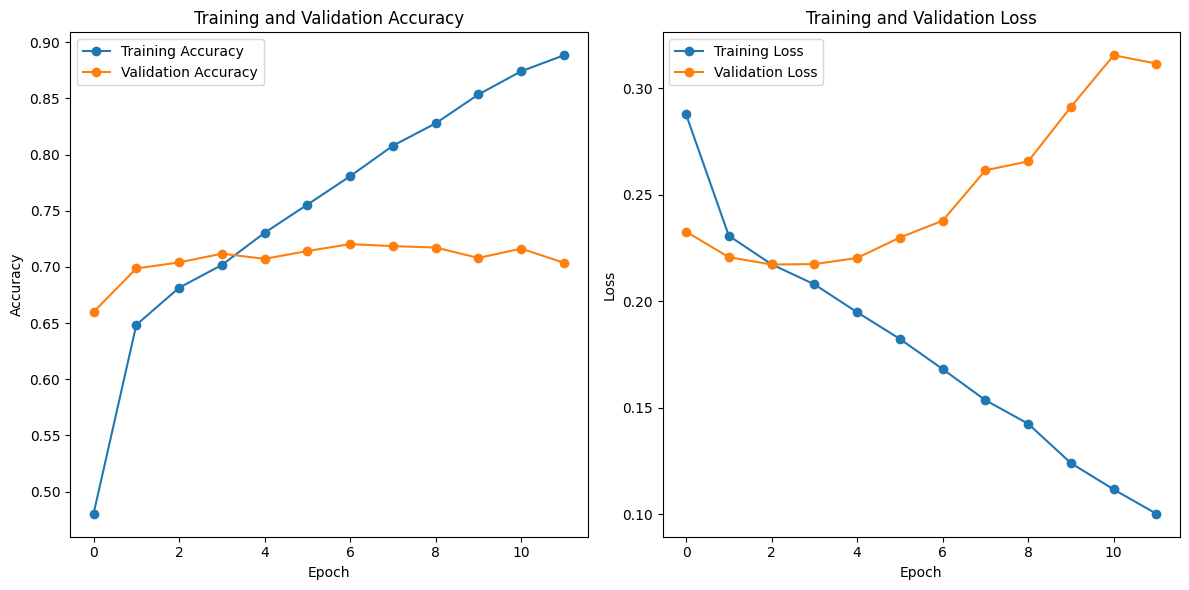

In [9]:
hlp.plot_history(history)

In [10]:
test_data_loader = hlp.create_data_loader(test_texts, test_labels, tokenizer, MAX_LEN, BATCH_SIZE)

test_acc, test_loss, test_label_actual, test_label_pred = hlp.eval_model_multi(model, test_data_loader, device)

print(f'Test Accuracy: {test_acc:.2f} Test Loss: {test_loss}')

Test Accuracy: 0.69 Test Loss: 0.3257064578696067


Accuracy: 0.69
F1 Score: 0.68
Precision: 0.68
Recall: 0.69

Classification Report:
                    precision    recall  f1-score   support

        Disability       0.22      0.03      0.05       517
     Gender/Sexual       0.70      0.66      0.68      3629
Origin/Nationality       0.22      0.35      0.27        84
    Race/Ethnicity       0.56      0.66      0.61      2913
          Religion       0.85      0.87      0.86      3111

          accuracy                           0.69     10254
         macro avg       0.51      0.51      0.49     10254
      weighted avg       0.68      0.69      0.68     10254



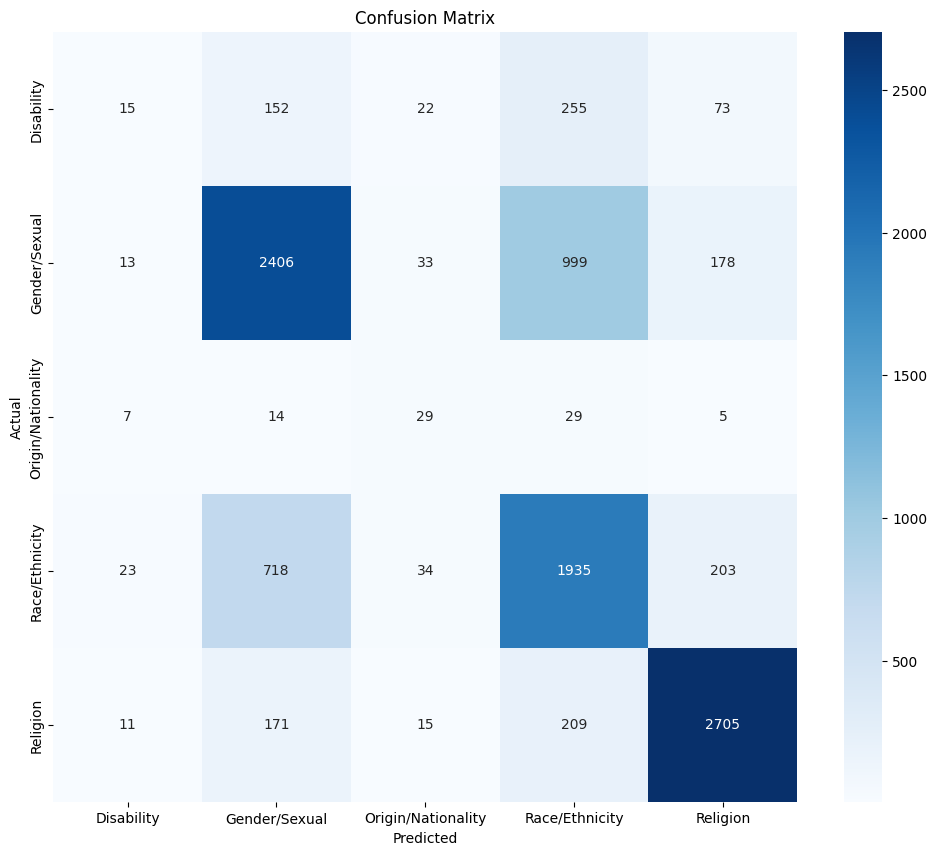

In [11]:
hlp.plot_confusion_matrix(np.argmax(test_label_actual, axis=1), np.argmax(test_label_pred, axis=1), class_names)

In [12]:
test_texts = ["This is the sort of thing that happens in a shithole country. @URL"]
preds, confidence = hlp.predict(test_texts, model, tokenizer, MAX_LEN, device)

index = list(confidence[0]).index(np.array(confidence[0]).max())

print(f"The predicted class is: {class_names[index]} with confidence: {confidence[0][index]:.2f}")

The predicted class is: Origin/Nationality with confidence: 0.97
